In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

In [2]:
df = pd.read_csv('final_database.csv')
df = df.drop(df.columns[0], axis=1)

In [3]:
df.head()

,cuisine,recipe_ingredients,recipe_name
0,african,2 tbsp vegetable oil ½ tsp cumin seeds ½ tsp f...,Bunny chow
1,african,"1 tbsp olive or vegetable oil 2 large onions, ...",Jollof rice with fried plantains
2,african,400ml/14fl oz passata 3 tbsp tomato purée 2 fr...,Jollof rice
3,african,4g smoked paprika 2g cayenne pepper 6g ginger...,Suya fillet burger with sweet potato cubes and...
4,african,300g/10½oz basmati rice 1 tbsp vegetable oil 8...,Jollof rice with chicken


In [5]:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
np.random.seed(0)

In [7]:
ingredients = df['recipe_ingredients'].tolist()
cuisine = df['cuisine'].tolist()

In [9]:
cuisine = df['cuisine'].tolist()

In [35]:
import re
stopwords_list = stopwords.words('english')+ list(string.punctuation)
stopwords_list+= ["''", '""', '...', '``']
stopwords_list+= ['tsp','tbsp',
             'tablespoon', 'teaspoon', 'tablespoons', 'teaspoons', 
             'large', 'cup', 'ounces', 'pound', 'oz', 'slice','sliced', 
             'cup', 'cups', 'ounce', 'ounces', 'chopped', 'finely', 'cut',
            'thinly', 'pounds', 'lb', 'lbs', 'g','oz', 'small', 'large']

#This function returns a PARAGRAPH of words that have stopwords and numbers removed
def process_recipe(recipe):
    tokens = nltk.word_tokenize(recipe)
    stopwords_removed = ' '.join([token.lower() for token in tokens if token not in stopwords_list])
    pattern= r"[a-z]+"
    regex_tokens = re.findall(pattern, stopwords_removed)
    return ' '.join(regex_tokens)

In [36]:
processed_ingredients = list(map(process_recipe, ingredients))

In [37]:
processed_ingredients

['vegetable oil cumin seeds fennel seeds cm in piece cinnamon stick green cardamom pods star anise bay leaf onion south african curry powder tomatoes kg lb oz boneless leg lamb cm in dices fresh ginger garlic curry leaves potatoes cubes size meat salt coriander leaves lime juice loaves crusty white bread unsliced across half middle crumbs removed coriander cress sprigs garnish',
 'olive vegetable oil onions x g oz cans plum tomatoes red pepper diced tomato pur e cayenne pepper chilli powder curry powder bay leaf sprig fresh thyme stock cube g oz long grain basmati rice salt freshly ground black pepper plantains slices deep fried green leaf salad',
 'ml fl passata tomato pur e fresh red scotch bonnet chillies seeds removed onions red peppers seeds removed roughly garlic cloves peeled fresh rosemary leaves fresh thyme leaves ground coriander sweet smoked paprika ml fl olive oil g oz cherry tomatoes halved ml pints chicken stock vegetable stock bay leaves g lb oz long grain rice rinsed su

In [48]:
ingredients_df = pd.DataFrame(processed_ingredients)
cuisines_df = pd.DataFrame(cuisine)


In [28]:
model_df = pd.concat([ingredients_df, cuisines_df], axis=1, sort=False)

In [33]:
model_df.columns = ['ingredients','cuisine']

In [74]:
recipes = processed_ingredients
vec = CountVectorizer()
X = vec.fit_transform(recipes)
tokenized_matrix = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [75]:
tokenized_model = pd.concat([tokenized_matrix, cuisines_df], axis=1, sort=False)
tokenized_model = tokenized_model.rename(columns={tokenized_model.columns[-1]: "cuisine" })

In [76]:
def number(c):
    if c['cuisine'] == "african":
        return 1
    elif c['cuisine'] == "american":
        return 2
    elif c['cuisine'] == "british":
        return 3
    elif c['cuisine'] == "chinese":
        return 4
    elif c['cuisine'] == "french":
        return 5
    elif c['cuisine'] == "greek":
        return 6
    elif c['cuisine'] == "indian":
        return 7
    elif c['cuisine'] == "irish":
        return 8
    elif c['cuisine'] == "italian":
        return 9
    elif c['cuisine'] == "japanese":
        return 10
    elif c['cuisine'] == "korean":
        return 11
    elif c['cuisine'] == "mexican":
        return 12
    elif c['cuisine'] == "thai_and_south-east_asian":
        return 13
    elif c['cuisine'] == "turkish_and_middle_eastern":
        return 14

    

tokenized_model['num'] = tokenized_model.apply(number, axis=1)
 

In [84]:
type(tokenized_model.num)

pandas.core.series.Series

In [86]:
tokenized_model.cuisine.unique()

array(['african', 'american', 'british', 'chinese', 'french', 'greek',
       'indian', 'irish', 'italian', 'japanese', 'korean', 'mexican',
       'thai_and_south-east_asian', 'turkish_and_middle_eastern'],
      dtype=object)

In [87]:
tokenized_model.head()

,about,abuelita,aburaage,accompaniment,accompaniments,according,achiote,acid,across,acting,...,yuzupassion,za,zansh,zarame,zest,zester,ziti,zucchini,cuisine,num
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,african,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,african,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,african,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,african,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,african,1


In [155]:
data = tokenized_model.iloc[:,:-2]
target = tokenized_model.num
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, train_size = .8)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [52]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# tf_idf_data_train = vectorizer.fit_transform(data)
# tf_idf_data_test = vectorizer.transform(newsgroups_test.data)


In [ ]:
target = model_df.cuisine
data = model_df.ingredients
#tokenize the data, transform it into a tfidf dataframe, concat the target to the big dataframe
#then run vectorizer on all of the ingredients (not cuisine)
#train test split

In [89]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [94]:
nb_classifier.fit(X_train, y_train)
nb_preds = nb_classifier.predict(X_test)

In [95]:
nb_train_score = accuracy_score(y_test, nb_preds)

In [96]:
nb_train_score

0.5764705882352941

In [138]:
rf_classifier.fit(X_train, y_train)
rf_preds = rf_classifier.predict(X_test)
rf_train_score = accuracy_score(y_test, rf_preds)
rf_train_score

0.6323529411764706

In [98]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [139]:
knn_classifier= KNC()
knn_classifier.fit(X_train, y_train)
knn_test_preds= knn_classifier.predict(X_test)
knn_train_score = accuracy_score(y_test, knn_test_preds)
knn_train_score

0.40588235294117647

In [148]:
svm_classifier = svm.SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)
svm_test_preds = svm_classifier.predict(X_test)
svm_train_score = accuracy_score(y_test, svm_test_preds)
svm_train_score

0.5117647058823529

In [147]:
svm_classifier = svm.SVC(probability=True)
svm_classifier.fit(X_train, y_train)
svm_test_preds = svm_classifier.predict(X_test)
svm_train_score = accuracy_score(y_test, svm_test_preds)
svm_train_score

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.15294117647058825

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Binarize the output
y = label_binarize(target, classes=[0, 1, 2])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y, train_size = .8)
# n_classes = 14

# Learn to predict each class against the other
classifier = RandomForestClassifier(n_estimators=100, oob_score=True)
#classifier = RandomForestClassifier(n_estimators=100, oob_score=True)

y_score = classifier.fit(X_train, y_train).oob_score()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in list(range(n_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
labels = ['african', 'american', 'british', 'chinese', 'french', 'greek', 'indian', 'irish', 'italian', 'japanese', 'korean', 'mexican', 'thai_south_east_asian', 'turkish_middle_eastern']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(labels[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


TypeError: 'bool' object is not callable

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


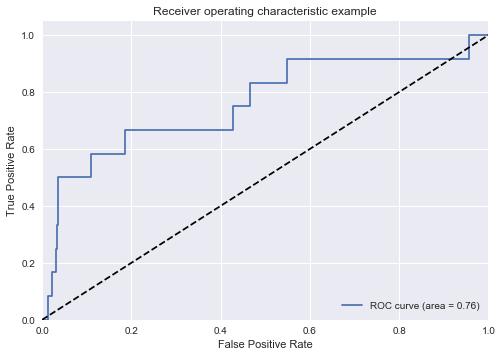

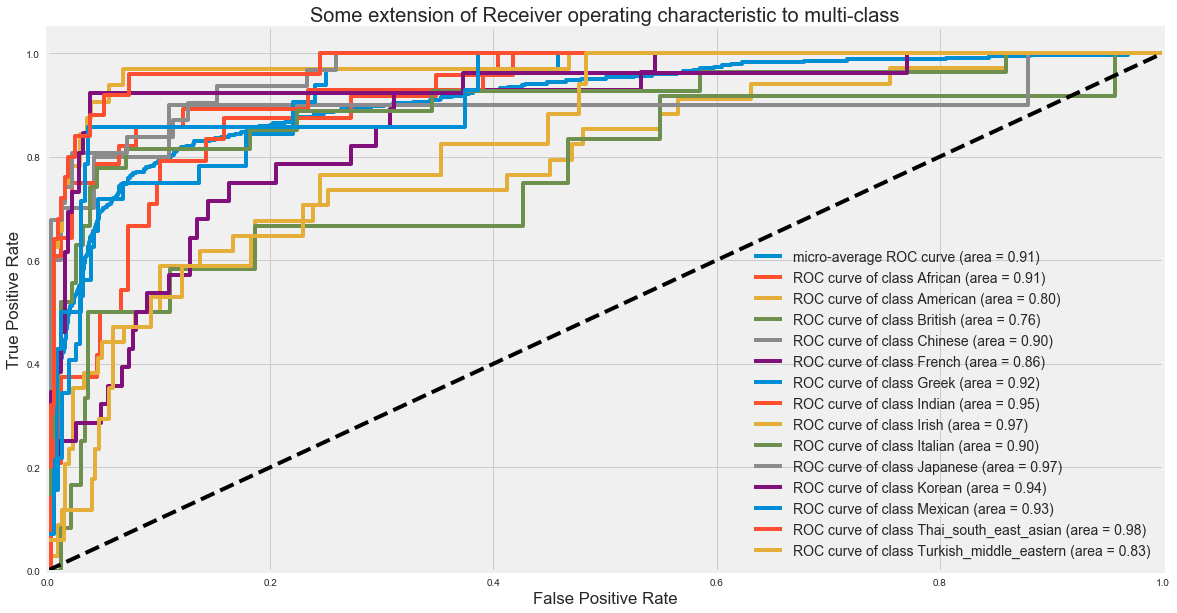

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Binarize the output
y = label_binarize(target, classes=list(range(1,15)))
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y, train_size = .8)
# n_classes = 14

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
#classifier = RandomForestClassifier(n_estimators=100, oob_score=True)

y_score = classifier.fit(X_train, y_train).decision_function(X_test)                              

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in list(range(n_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

labels = ['African', 'American', 'British', 'Chinese', 'French', 'Greek', 'Indian', 'Irish', 'Italian', 'Japanese', 'Korean', 'Mexican', 'Thai_south_east_asian', 'Turkish_middle_eastern']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right", fontsize = 14)
plt.show()